In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib.colors import LogNorm
import matplotlib
matplotlib.collections.PolyCollection

def parsefn(x):
    if "ashrafsamplesent" in x:
        return (408,17094, 42,0)
    elif "voxpopuli_ipatranscription" in x:
        return (15917,49882,42,0)
    else:
        return tuple([int(x.split('_')[1]) for x in Path(x).stem[5:].split('-')])

sns.set_context('talk')

In [2]:
def plot(dfy, colA, colB, hue):
    plt.figure(figsize=(7,5))
    plt.vlines(1,0,dfy[colA].max(), color='k',alpha=0.5, lw=1)
    plt.hlines(1,0,dfy[colB].max(), color='k',alpha=0.5, lw=1)
    m = min(dfy[colB].max(), dfy[colA].max())
    plt.plot([0,m],[0,m],color='k', lw=1, alpha=0.5)
    plt.scatter(dfy[colB], dfy[colA], c = dfy[hue], s=5, norm=LogNorm())
    if ~(dfy[colB].iloc[-1:].isna().all()) and ~(dfy[colA].iloc[-1:].isna().all()):
        plt.scatter(dfy[colB].iloc[-1:], dfy[colA].iloc[-1:], c = dfy[hue].iloc[-1:], s=150, norm=LogNorm(), marker='s',  edgecolor='black')
    
    plt.xscale("log")
    plt.yscale("log")
    plt.colorbar(label=hue)
    plt.xlabel(colB+'\nfactor rel openfst')
    plt.ylabel(colA+'\nfactor rel openfst')

In [3]:
dffsac = pd.read_csv("../data/fsadb_uw_composed.csv")
dffsac = dffsac[dffsac['nstates']!=0]

<Axes: xlabel='nstates', ylabel='narcs'>

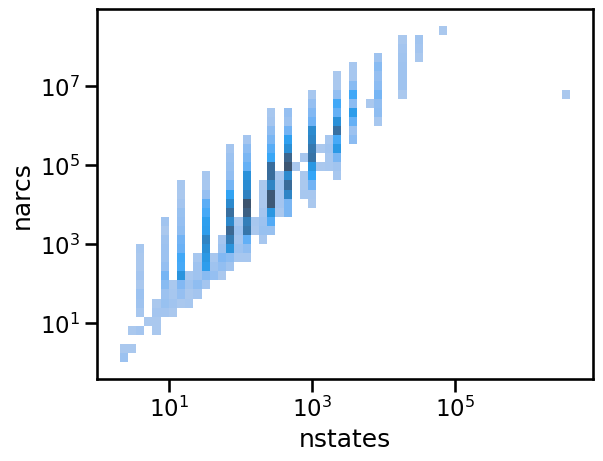

In [4]:
sns.histplot(data=dffsac, x="nstates", y="narcs", fill=True,log_scale=(10,10))

In [101]:
dfbenchk2 = pd.read_csv("../results/fsadb_uw_composed_k2_cpu1_compbenchs.csv")
dfbenchk2["name"]="k2"
dfbenchk2[["min","max","mean","std"]] = dfbenchk2[["min","max","mean","std"]]*1e9
print(len(dfbenchk2))

dfbenchk2cuda = pd.read_csv("../results/fsadb_uw_composed_k2_cuda_compbenchs.csv")
dfbenchk2cuda["name"]="k2cuda"
dfbenchk2cuda[["min","max","mean","std"]] = dfbenchk2cuda[["min","max","mean","std"]]*1e9
print(len(dfbenchk2cuda))

991
897


In [102]:
dfbench = pd.concat([
           pd.read_csv("../results/fsadb_uw_TensorFSTs_compbenchs.csv"),
           pd.read_csv("../results/fsadb_uw_TensorFSTs_onlycomp_compbenchs.csv"),
           pd.read_csv("../results/fsadb_uw_CooOfCooLod_compbenchs.csv"),
           pd.read_csv("../results/fsadb_uw_CooOfDictLod_compbenchs.csv"),
           pd.read_csv("../results/fsadb_uw_CooOfCooMTLod_compbenchs.csv"),
           pd.read_csv("../results/fsadb_uw_CscOfCooLod_compbenchs.csv"),
           pd.read_csv("../results/fsadb_uw_CooOfCooSod_compbenchs.csv"),                     
           pd.read_csv("../results/fsadb_uw_OpenFst_compbenchs.csv") 
          ])
dfbench = pd.concat([dfbench, dfbenchk2, dfbenchk2cuda])

systems = ["OpenFst", "CooOfCooLod", "CooOfCooMTLod", "CscOfCooLod", "CooOfCooSod","CooOfDictLod","TensorFSTs", "k2"]

In [103]:
dfreal = dfbench[dfbench['fileC']=='data/real/ashravox.fst'].copy()

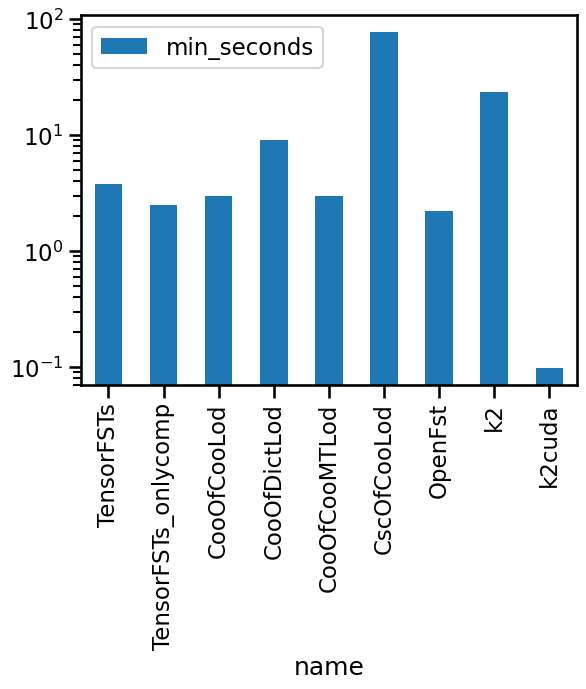

In [104]:
dfreal['min_seconds'] = dfreal['min']/1e9
dfreal.plot.bar(x='name',y='min_seconds')
plt.yscale('log')

In [105]:
dfbench[dfbench['name'] == 'TensorFSTs_onlycomp']['equivalence'].value_counts()

equivalence
1.0    5
Name: count, dtype: int64

In [106]:
dfbench[dfbench['fileC']=='data/real/ashravox.fst']

,fileA,fileB,fileC,min,max,mean,std,name,nstates,narcs,conn_nstates,conn_narcs,equivalence
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,3.786730e+09,3.786730e+09,3.786730e+09,NaN,TensorFSTs,6494136,13824162,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,2.483289e+09,2.483289e+09,2.483289e+09,NaN,TensorFSTs_onlycomp,6494136,13824162,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,3.001228e+09,3.001228e+09,3.001228e+09,NaN,CooOfCooLod,6494136,13824162,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,9.104556e+09,9.104556e+09,9.104556e+09,NaN,CooOfDictLod,6494136,13824162,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,2.974285e+09,2.974285e+09,2.974285e+09,NaN,CooOfCooMTLod,6494136,13824162,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,7.743526e+10,7.743526e+10,7.743526e+10,NaN,CscOfCooLod,6494136,13824162,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,2.219439e+09,2.219439e+09,2.219439e+09,NaN,OpenFst,4179150,7013817,NaN,NaN,NaN
19,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,2.371236e+10,2.418309e+10,2.394772e+10,2.353676e+08,k2,4257029,7121788,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,9.758852e+07,1.053483e+08,9.906972e+07,1.675206e+06,k2cuda,4257029,7121788,NaN,NaN,NaN


In [107]:
dfbench['specsA'] = dfbench['fileA'].map(parsefn)
dfbench['specsB'] = dfbench['fileB'].map(parsefn)
dfbench['minimum_time_seconds'] = dfbench['min']/1e9
dfbench['mean_time_seconds'] = dfbench['mean']/1e9
dfbench = dfbench.rename(columns = {'nstates':'nstatesC','narcs':'narcsC'})

In [108]:
dfs = []
for k,g in dfbench.groupby('fileC'):
    if len(g)>1 and 'OpenFst' in g['name'].tolist():
#         display(g)
        g["time_rel_openfst"] =  g["minimum_time_seconds"]/(g[g["name"]=="OpenFst"]["minimum_time_seconds"]).values
        g["time_rel_tensorfst"] =  g["minimum_time_seconds"]/(g[g["name"]=="TensorFSTs_onlycomp"]["minimum_time_seconds"]).values
    #     g["time_rel_openfst"] =  g["mean_time_seconds"]/(g[g["name"]=="OpenFst"]["mean_time_seconds"]).values
        dfs.append(g)
dfs = pd.concat(dfs)
dfs = pd.concat([dfs,dfs['specsA'].apply(pd.Series).rename(columns={0:"nstatesA", 1:"narcsA", 2:"nsymsA", 3:"seedA"})],axis=1)
dfs = pd.concat([dfs,dfs['specsB'].apply(pd.Series).rename(columns={0:"nstatesB", 1:"narcsB", 2:"nsymsB", 3:"seedB"})],axis=1)



In [110]:
dfs["sparsityA"]=1-dfs["narcsA"]/(dfs['nstatesA']**2*dfs['nsymsA'])
dfs["lognarcsA"]=np.log10(dfs["narcsA"])
dfs["lognstatesA"]=np.log10(dfs["nstatesA"])
dfs["lognsymsA"]=np.log10(dfs["nsymsA"])
dfs["sparsityB"]=1-dfs["narcsB"]/(dfs['nstatesB']**2*dfs['nsymsB'])
dfs["lognarcsB"]=np.log10(dfs["narcsB"])
dfs["lognstatesB"]=np.log10(dfs["nstatesB"])
dfs["lognsymsB"]=np.log10(dfs["nsymsB"])
dfs["avgnsyms"]=(dfs["nsymsB"]+dfs["nsymsA"])/2
dfs["avgnstates"]=(dfs["nstatesB"]+dfs["nstatesA"])/2
dfs["avgnarcs"]=(dfs["narcsB"]+dfs["narcsA"])/2
dfs["avgsparsity"]=(dfs["sparsityA"]+dfs["sparsityB"])/2
# dfs = dfs[(dfs['avgnsyms']>8) & (dfs['avgnstates']>32)]

minsyms = 16
dfs = dfs[(dfs['nsymsB']>minsyms) & (dfs['nsymsA']>minsyms)]

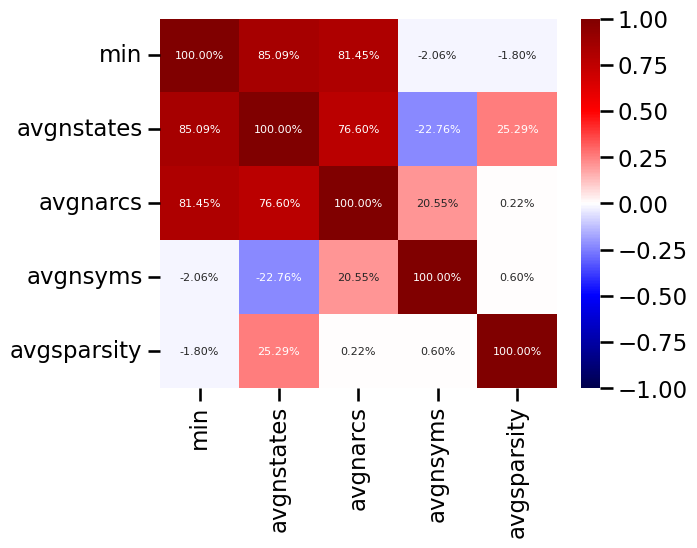

In [111]:
cc = dfs[dfs["name"]=="OpenFst"][['min','avgnstates', 'avgnarcs', 'avgnsyms',  'avgsparsity']].corr(method='spearman')
# plt.figure(figsize=(8,8))
heatmap = sns.heatmap(cc, vmin=-1, vmax=1, annot=True,  fmt=".2%",annot_kws={"size":8}, cmap='seismic')

In [112]:
# dfx = dfs[dfs["name"]=="OpenFst"]
# for c in ['avgnstates', 'avgnarcs', 'avgnsyms',  'avgsparsity']:
#     plt.figure()    
#     plt.scatter(dfx[c], dfx['min'],s=10)    
# plt.yscale('log')

(0.0, 1.0)

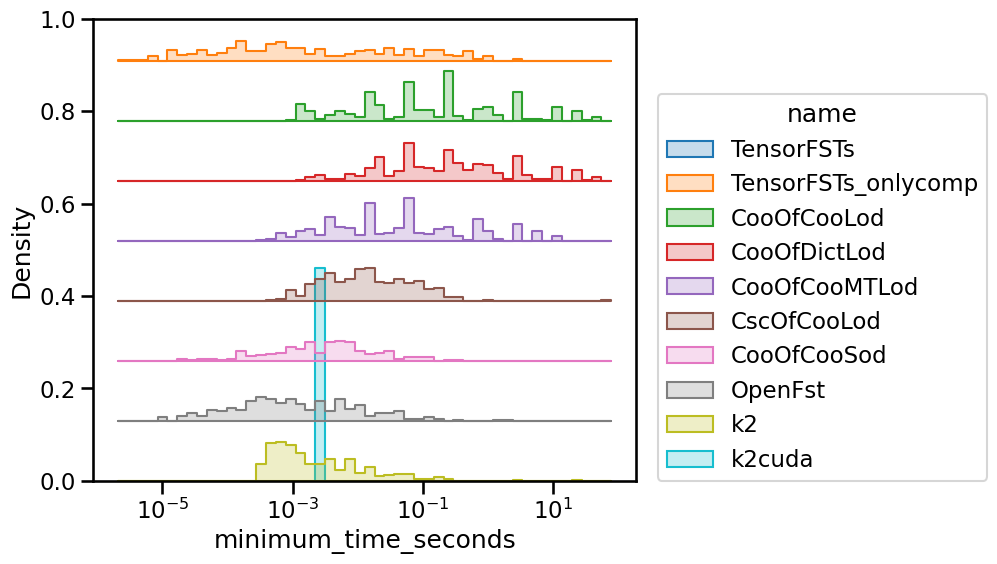

In [113]:
plt.figure(figsize=(7,6))
# plt.vlines(1,0,1, color='k',lw=1)
g = sns.histplot(data=dfs,bins=50, x="minimum_time_seconds", hue="name", element="step", stat="density", log_scale=True)
# plt.xlim(0.4,50);
# plt.xlabel("factor relative to OpenFst (<1 better)")
sns.move_legend(plt.gca(),loc=(1.04, 0 ), ncol=1)
ax = plt.gca()
for i,x in enumerate(ax.get_children()):
    if isinstance(x, matplotlib.collections.PolyCollection):
        x.set_offsets([0.0,(i-1)*60.0])
plt.ylim(0,1.0)

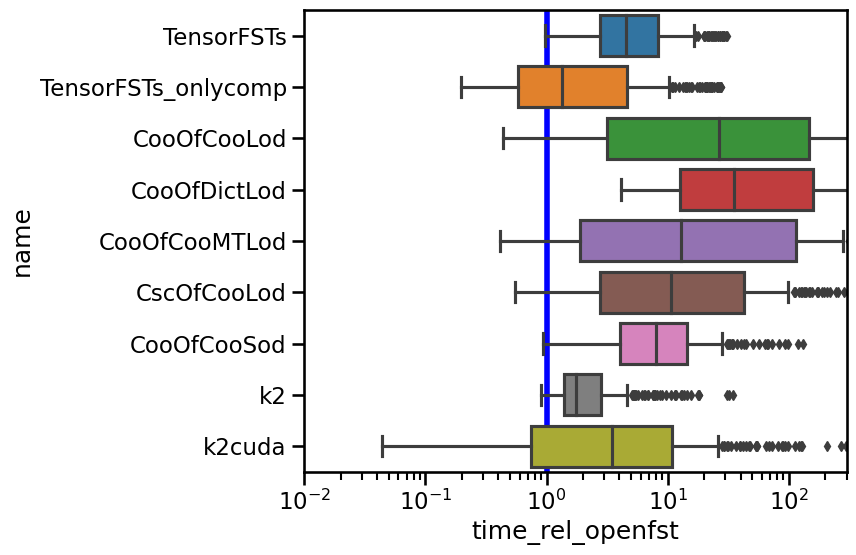

In [117]:
plt.figure(figsize=(7,6))
plt.vlines(1,-10,10, color='b',lw=4, zorder=-1)

g = sns.boxplot(data=dfs[(dfs["time_rel_openfst"]<xlim) & (dfs["name"]!="OpenFst")], 
                x="time_rel_openfst", y="name", orient='horizontal')
plt.xscale('log')

plt.xlim(0.01,300);

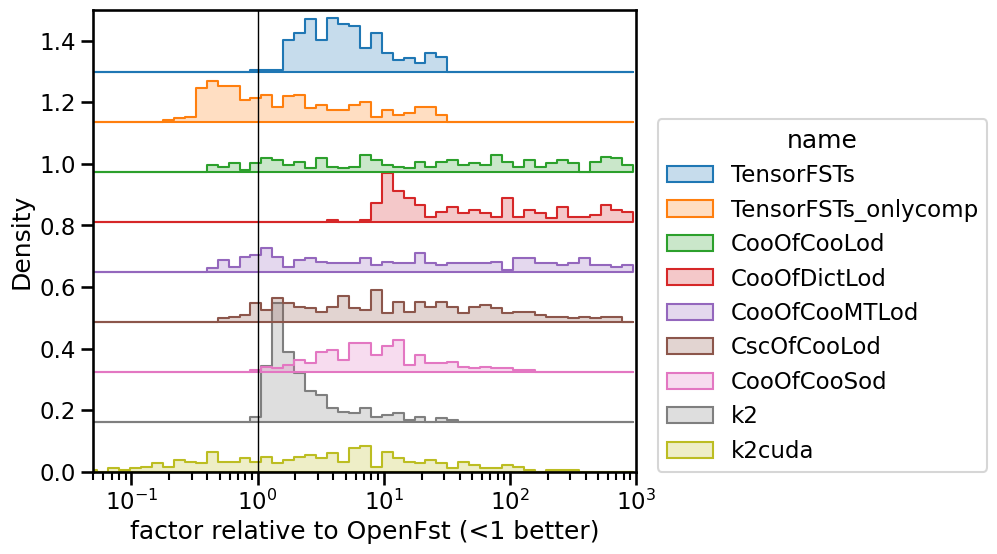

In [118]:
plt.figure(figsize=(7,6))
plt.vlines(1,0,2, color='k',lw=1)
xlim = 1000
g = sns.histplot(data=dfs[(dfs["time_rel_openfst"]<xlim) & (dfs["name"]!="OpenFst")],bins=50, 
                 x="time_rel_openfst", hue="name",  element="step", stat="density", log_scale=True)
plt.xlim(0.05,xlim);
plt.xlabel("factor relative to OpenFst (<1 better)")
sns.move_legend(plt.gca(),loc=(1.04, 0 ), ncol=1)
ax = plt.gca()
plt.ylim(0,1.5)
for i,x in enumerate(ax.get_children()):
    if isinstance(x, matplotlib.collections.PolyCollection):
        x.set_offsets([0.0,(i-1)*50.0])

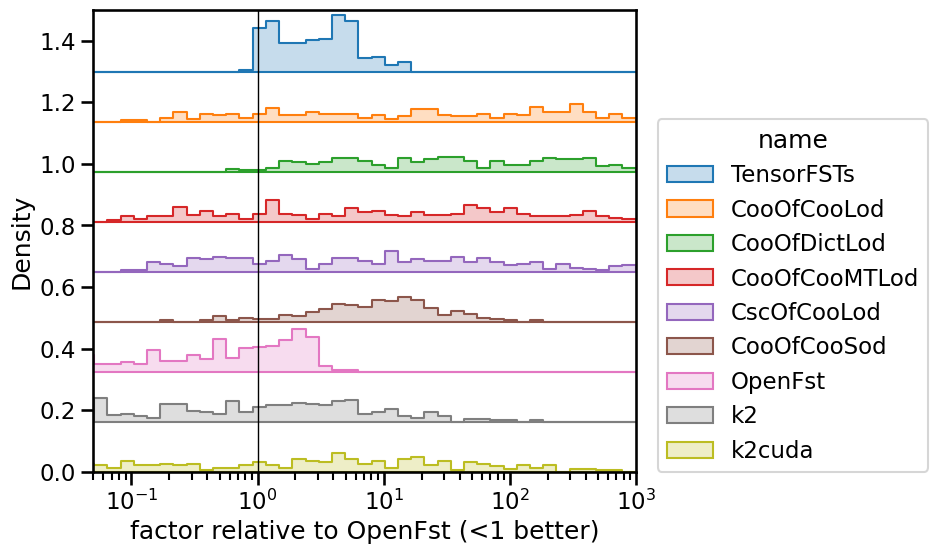

In [119]:
plt.figure(figsize=(7,6))
plt.vlines(1,0,2, color='k',lw=1)
xlim = 1000
g = sns.histplot(data=dfs[(dfs["time_rel_tensorfst"]<xlim) & (dfs["name"]!="TensorFSTs_onlycomp")],bins=50, 
                 x="time_rel_tensorfst", hue="name",  element="step", stat="density", log_scale=True)
plt.xlim(0.05,xlim);
plt.xlabel("factor relative to OpenFst (<1 better)")
sns.move_legend(plt.gca(),loc=(1.04, 0 ), ncol=1)
ax = plt.gca()
plt.ylim(0,1.5)
for i,x in enumerate(ax.get_children()):
    if isinstance(x, matplotlib.collections.PolyCollection):
        x.set_offsets([0.0,(i-1)*50.0])

In [120]:
# np.vstack([
#     dfs[dfs["name"]=="TensorFSTs"].sort_values('time_rel_openfst').iloc[-4:][['fileA','fileB','fileC']].values,
#     dfs[dfs["name"]=="CooOfCoo"].sort_values('time_rel_openfst').iloc[-4:][['fileA','fileB','fileC']].values
# ])

In [121]:
# dfs[dfs['time_rel_openfst']<1].value_counts(['nsymsA','nsymsB', 'nstatesA', 'nstatesB', 'narcsA', 'narcsB'])

In [122]:
dfy = pd.pivot_table(dfs, "time_rel_openfst", "fileC", "name")
dfy = pd.concat([dfy, dfs[dfs["name"]=="OpenFst"].set_index("fileC")],axis=1)

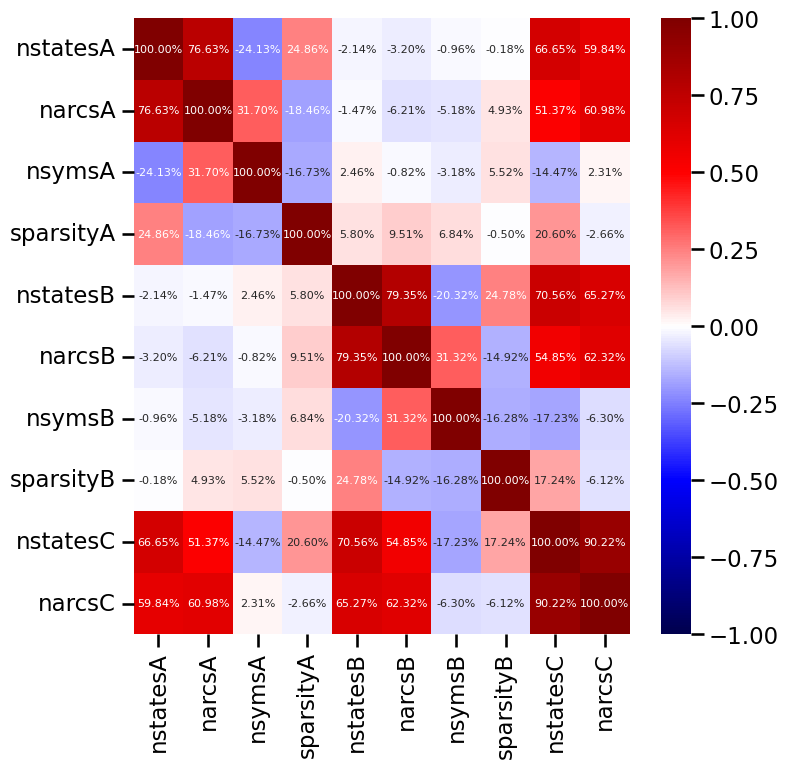

In [123]:
cc = dfy[['nstatesA', 'narcsA', 'nsymsA',  'sparsityA', 'nstatesB', 'narcsB', 'nsymsB', 'sparsityB', 'nstatesC', 'narcsC']].corr(method='spearman')
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(cc, vmin=-1, vmax=1, annot=True,  fmt=".2%",annot_kws={"size":8}, cmap='seismic')

In [124]:
dfy

,CooOfCooLod,CooOfCooMTLod,CooOfCooSod,CooOfDictLod,CscOfCooLod,OpenFst,TensorFSTs,TensorFSTs_onlycomp,k2,k2cuda,...,lognstatesA,lognsymsA,sparsityB,lognarcsB,lognstatesB,lognsymsB,avgnsyms,avgnstates,avgnarcs,avgsparsity
fileC,,,,,,,,,,,,,,,,,,,,,
data/fsadb_uw_composed/0019_0769.fst,4.856360,2.946336,6.674953,13.720878,4.281622,1.0,2.550165,0.507646,2.915277,10.058230,...,1.20412,1.505150,0.806641,1.995635,0.602060,1.505150,32.0,10.0,843.0,0.806458
data/fsadb_uw_composed/0038_0328.fst,1643.569937,420.758432,6.389658,1677.401039,59.935880,1.0,5.022714,1.151504,2.006678,5.476084,...,0.30103,2.107210,0.850586,3.990871,1.204120,2.408240,192.0,9.0,4984.5,0.752441
data/fsadb_uw_composed/0045_1667.fst,2408.307561,607.140454,3.100378,2551.255577,94.394707,1.0,0.970038,0.198204,31.856899,293.433368,...,0.30103,2.107210,0.904297,1.690196,0.602060,1.505150,80.0,3.0,62.5,0.877930
data/fsadb_uw_composed/0054_0788.fst,455.192097,110.999887,8.625597,474.930281,24.303698,1.0,9.952641,1.388551,2.142401,6.195975,...,0.30103,1.806180,0.601562,4.416840,1.204120,2.408240,160.0,9.0,13093.5,0.654297
data/fsadb_uw_composed/0062_0813.fst,55482.900688,14880.764058,1.881255,56055.078934,406.580138,1.0,2.775752,0.408512,30.645488,204.660618,...,0.30103,2.408240,0.804688,1.698970,0.301030,1.806180,160.0,2.0,203.5,0.728027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
data/fsadb_uw_composed/2321_1356.fst,4889.086963,1304.829386,10.350773,4931.442355,89.231054,1.0,30.695914,20.589002,1.830187,3.623734,...,0.60206,2.107210,0.500977,4.213571,0.903090,2.709270,320.0,6.0,8379.0,0.651367
data/fsadb_uw_composed/2322_0945.fst,7.281396,2.296692,NaN,15.503031,1.741360,1.0,3.958400,2.165838,1.223128,0.354550,...,0.90309,2.107210,0.709381,3.978774,1.505150,1.505150,80.0,20.0,5574.0,0.755508
data/fsadb_uw_composed/2323_1309.fst,21.097619,5.867566,34.709010,28.645193,4.399885,1.0,3.067356,1.089284,1.370885,1.023225,...,1.20412,2.107210,0.903198,2.899273,1.204120,1.505150,80.0,16.0,3647.5,0.852386


In [125]:
dfy[~dfy['CooOfCooSod'].isna()]['avgnsyms'].max()

512.0

In [126]:
# cc = dfy[['CooOfCoo', 'TensorFSTs','k2', 'nstatesA', 'narcsA', 'nsymsA', 'seedA', 'nstatesB',
#        'narcsB', 'nsymsB', 'seedB', 'sparsityA', 'lognarcsA', 'lognstatesA',
#        'lognsymsA', 'sparsityB', 'lognarcsB', 'lognstatesB', 'lognsymsB' ]].corr()

# display(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[['nstatesA', 'narcsA', 'nsymsA']])

# display(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[['lognstatesA', 'lognarcsA', 'lognsymsA']])

# display(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[['lognstatesA', 'lognarcsA', 'nsymsA']])

In [152]:
cc = dfy[systems+['nstatesA', 'narcsA', 'nsymsA', 'seedA', 'nstatesB',
       'narcsB', 'nsymsB', 'seedB', 'sparsityA', 'lognarcsA', 'lognstatesA',
       'lognsymsA', 'sparsityB', 'lognarcsB', 'lognstatesB', 'lognsymsB', 'nstatesC', 'narcsC']].corr(method='spearman')

cols = ['nstatesA', 'narcsA', 'nsymsA', 'nstatesB','narcsB', 'nsymsB', 'nstatesC', 'narcsC']

display(cc[systems].loc[cols])
# print(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[cols].to_latex(escape=False,float_format="%.2f",))
# print(cc[systems].loc[cols].to_html(float_format="%.2f"))

,OpenFst,CooOfCooLod,CooOfCooMTLod,CscOfCooLod,CooOfCooSod,CooOfDictLod,TensorFSTs,k2
nstatesA,NaN,-0.488561,-0.494234,-0.505188,0.319805,-0.483362,0.314667,-0.405190
narcsA,NaN,-0.150439,-0.156864,-0.305422,-0.023660,-0.142077,0.467196,-0.411618
nsymsA,NaN,0.593163,0.589492,0.387174,-0.280237,0.590619,0.217002,-0.029780
nstatesB,NaN,-0.474715,-0.488871,-0.559621,0.316666,-0.483082,0.266084,-0.678611
narcsB,NaN,-0.228319,-0.251487,-0.314525,0.372762,-0.234964,0.547684,-0.654598
nsymsB,NaN,0.475658,0.455129,0.492835,0.379643,0.466463,0.464029,-0.018806
nstatesC,NaN,-0.695079,-0.710203,-0.778048,0.555514,-0.697865,0.413814,-0.826255
narcsC,NaN,-0.602660,-0.617676,-0.746508,0.200938,-0.600578,0.539925,-0.876944


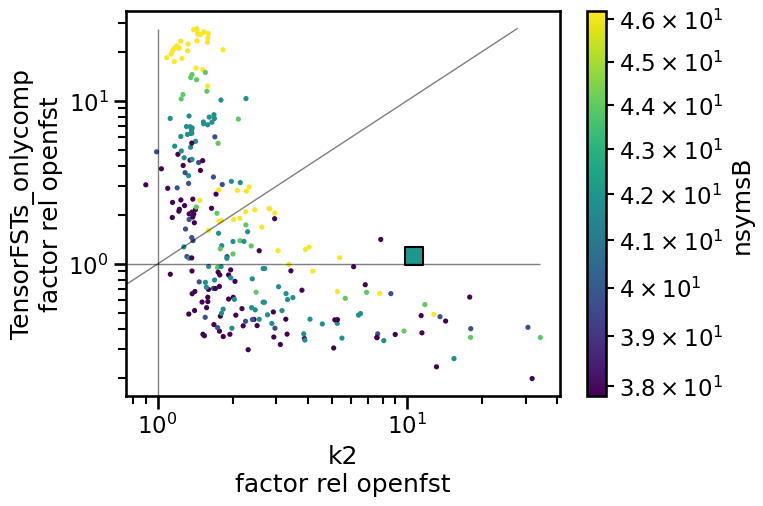

In [151]:
plot(dfy, "TensorFSTs_onlycomp", "k2", "nsymsB")

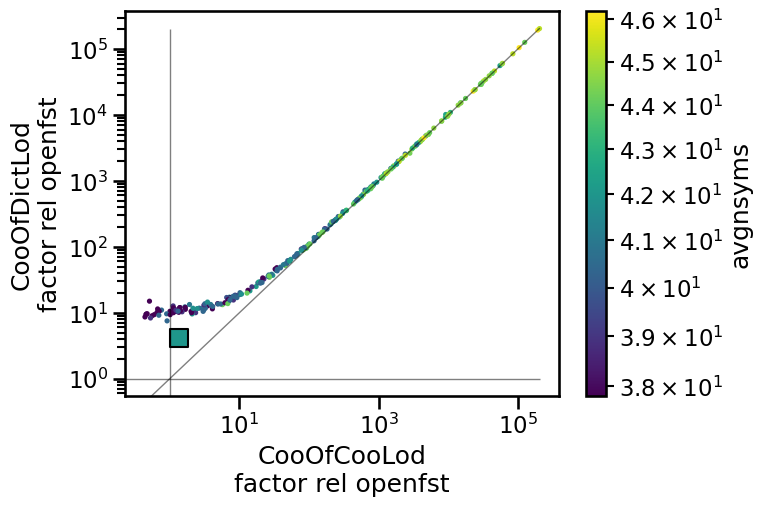

In [128]:
plot(dfy, "CooOfDictLod", "CooOfCooLod", "avgnsyms")

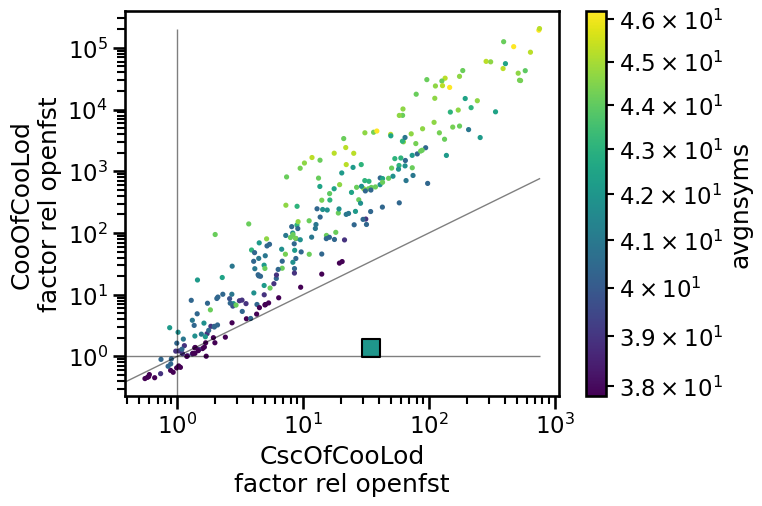

In [129]:
plot(dfy, "CooOfCooLod", "CscOfCooLod", "avgnsyms")

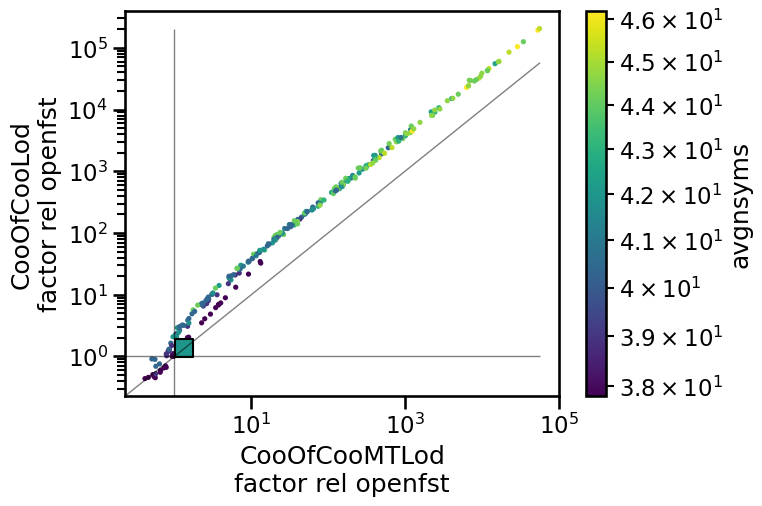

In [130]:
plot(dfy, "CooOfCooLod", "CooOfCooMTLod", "avgnsyms")

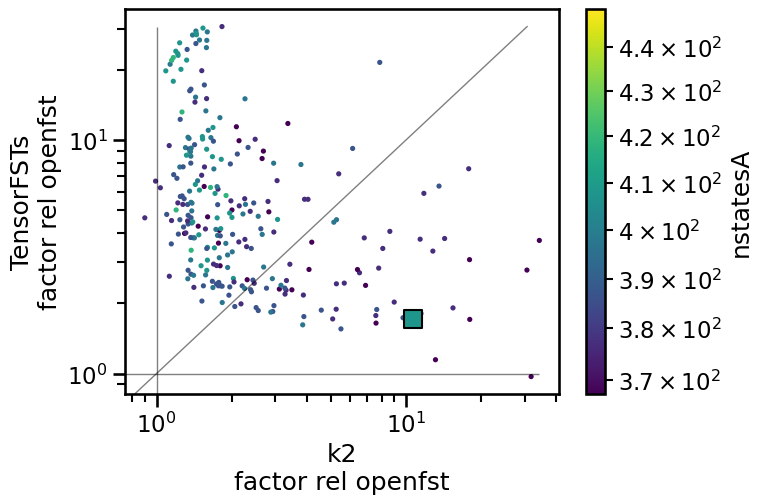

In [131]:
plot(dfy, "TensorFSTs", "k2", "nstatesA")

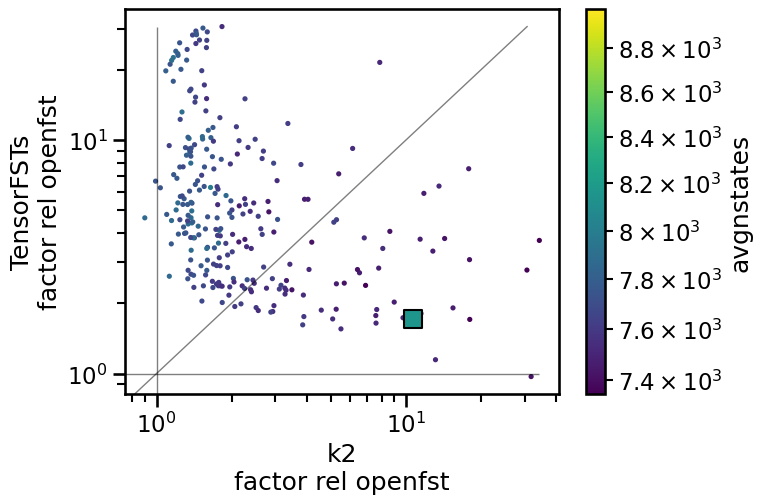

In [132]:
plot(dfy, "TensorFSTs", "k2", "avgnstates")

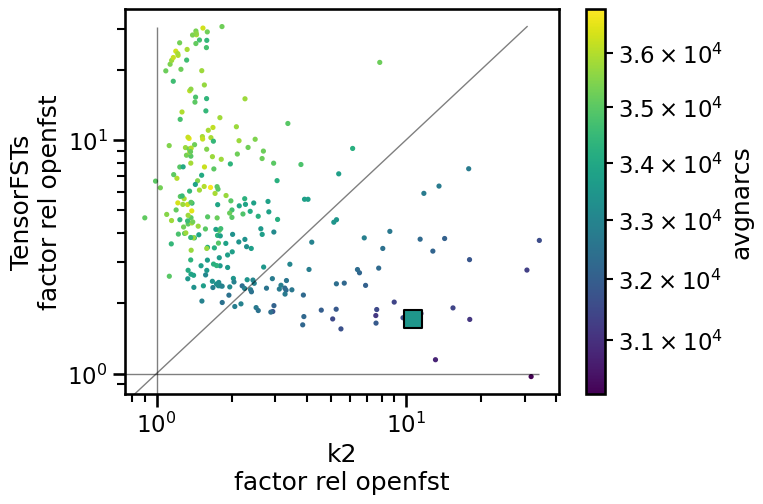

In [133]:
plot(dfy, "TensorFSTs", "k2", "avgnarcs")

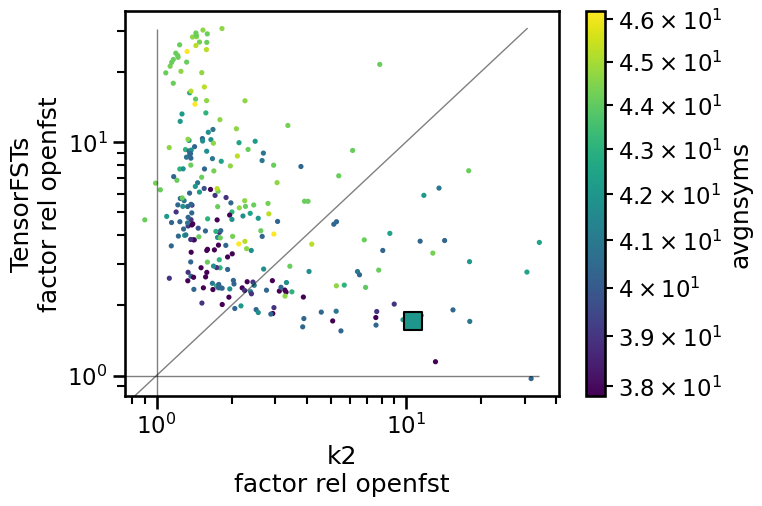

In [134]:
plot(dfy, "TensorFSTs", "k2", "avgnsyms")

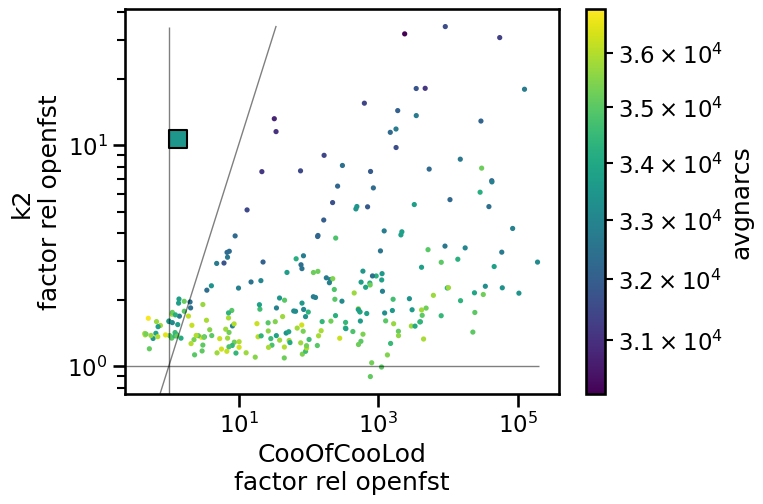

In [135]:
plot(dfy, "k2", "CooOfCooLod", "avgnarcs")

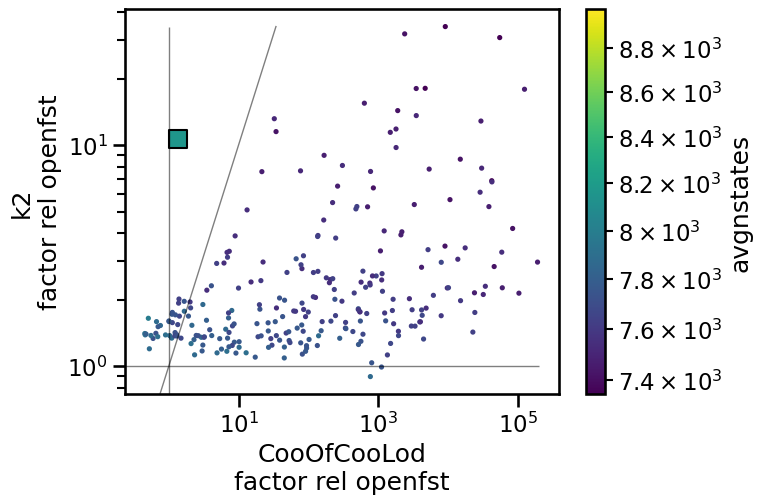

In [136]:
plot(dfy, "k2", "CooOfCooLod", "avgnstates")

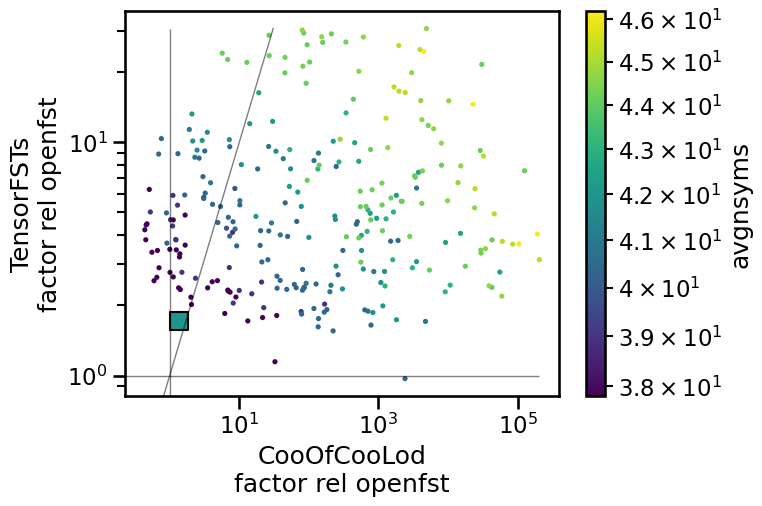

In [138]:
plot(dfy, "TensorFSTs", "CooOfCooLod", "avgnsyms")

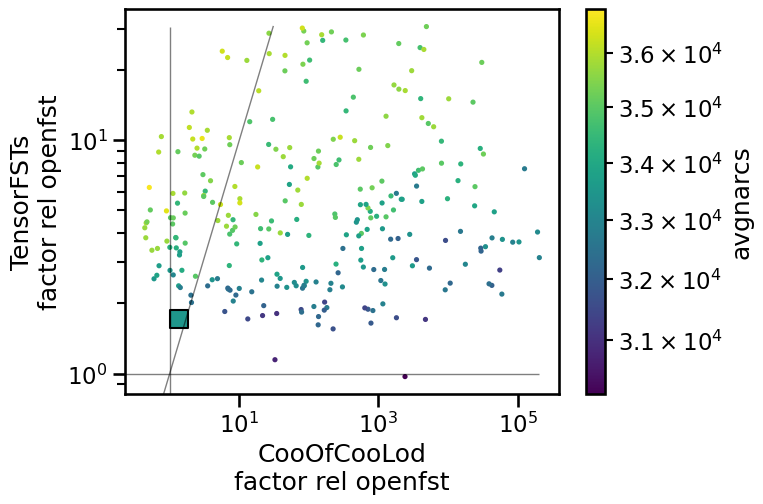

In [139]:
plot(dfy, "TensorFSTs", "CooOfCooLod", "avgnarcs")

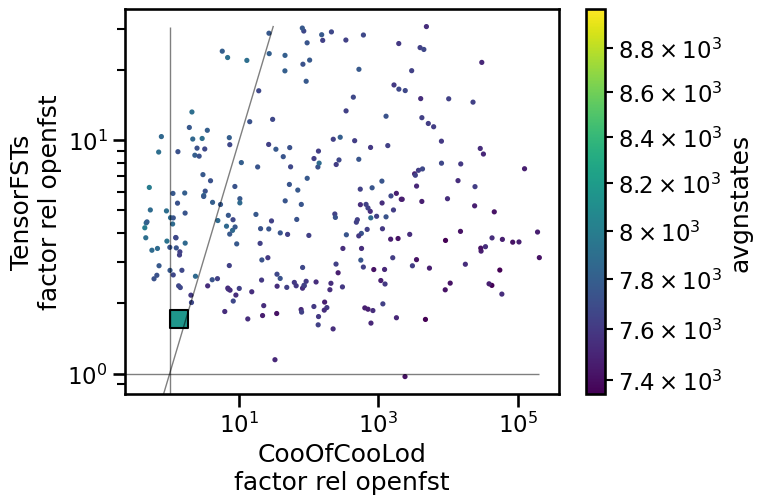

In [140]:
plot(dfy, "TensorFSTs", "CooOfCooLod", "avgnstates")

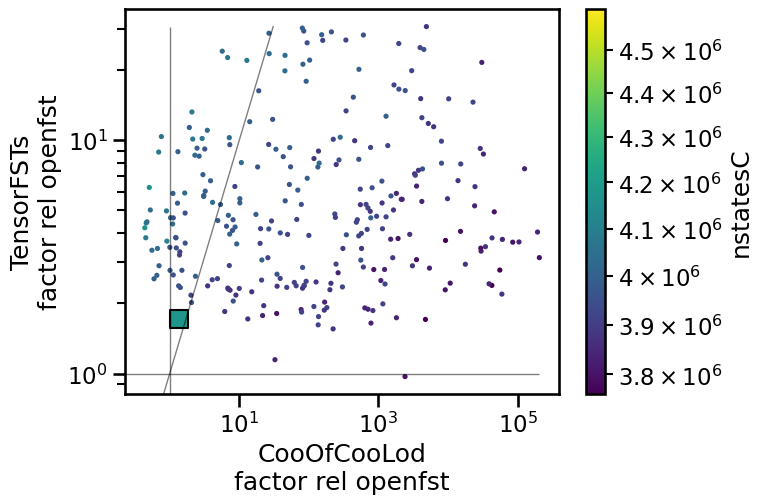

In [141]:
plot(dfy, "TensorFSTs", "CooOfCooLod", "nstatesC")

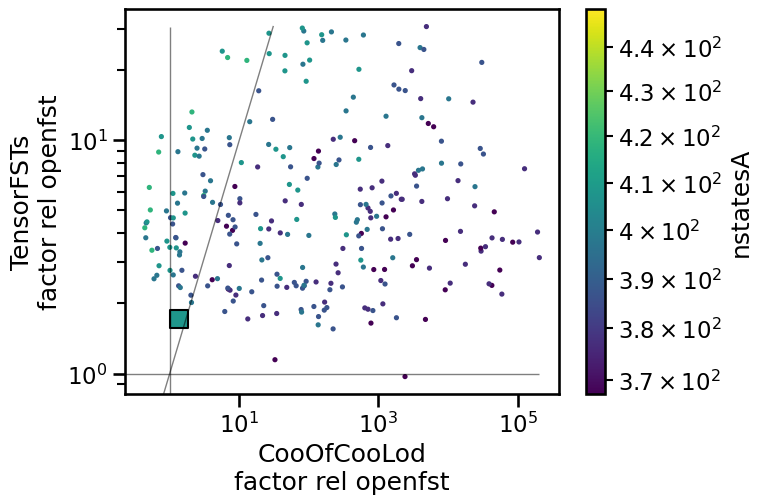

In [142]:
plot(dfy, "TensorFSTs", "CooOfCooLod", "nstatesA")

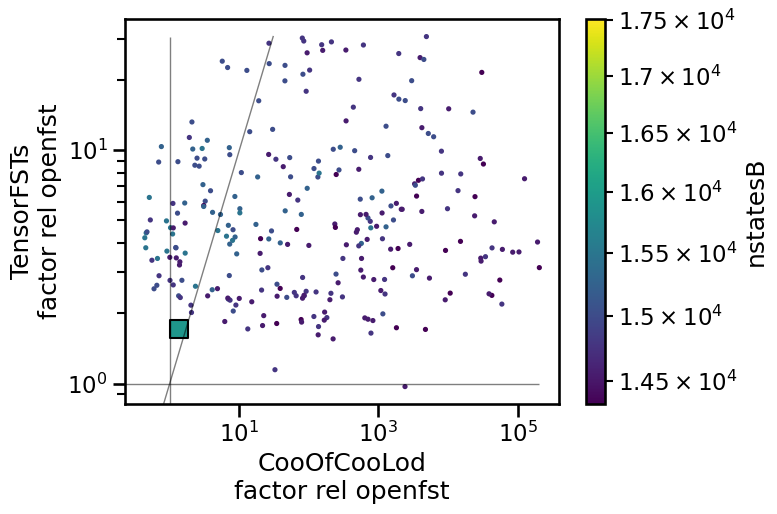

In [143]:
plot(dfy, "TensorFSTs", "CooOfCooLod", "nstatesB")

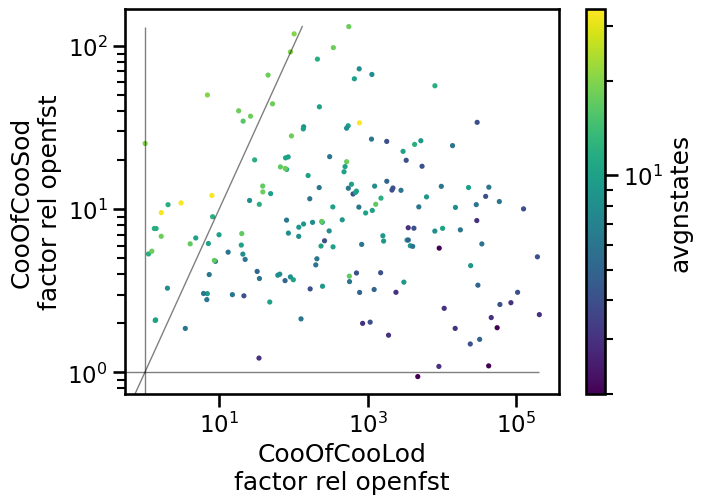

In [144]:
plot(dfy, "CooOfCooSod", "CooOfCooLod", "avgnstates")

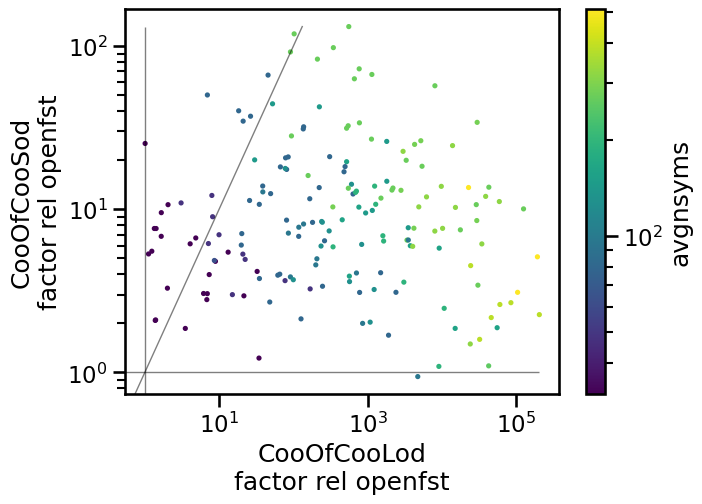

In [145]:
plot(dfy, "CooOfCooSod", "CooOfCooLod", "avgnsyms")

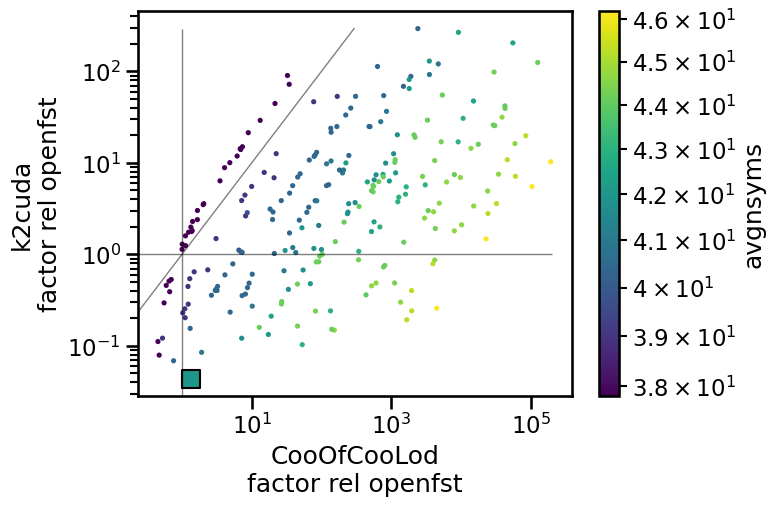

In [146]:
plot(dfy, "k2cuda", "CooOfCooLod", "avgnsyms")

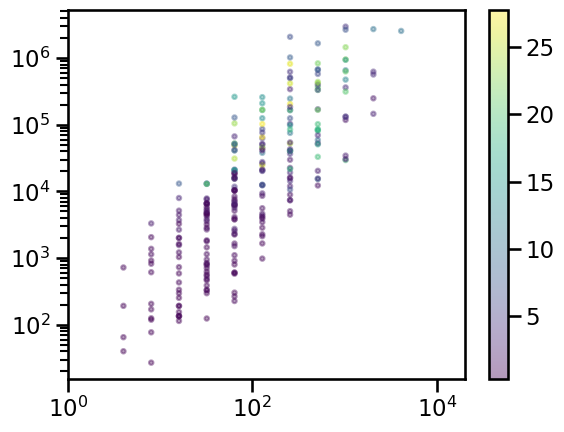

In [79]:
dfx = dfs[(dfs['name']=='TensorFSTs_onlycomp') & (dfs['avgnsyms']>80)]
plt.scatter( dfx["nstatesC"], dfx["narcsC"], c=dfx['time_rel_openfst'], s=10, alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,20e3)
plt.colorbar();

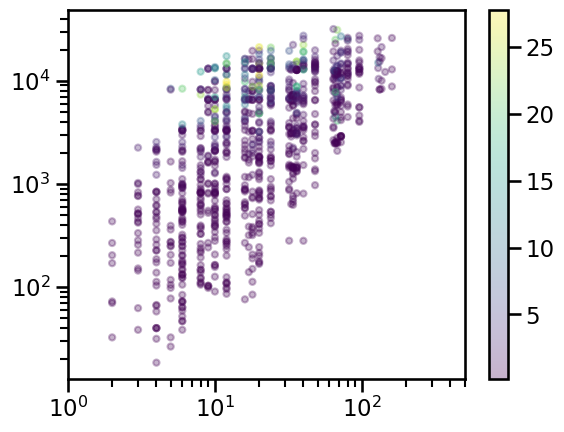

In [66]:
dfx = dfs[dfs['name']=='TensorFSTs_onlycomp']
plt.scatter( dfx["avgnstates"], dfx["avgnarcs"], c=dfx['time_rel_openfst'], s=20, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,0.5e3)
plt.colorbar()

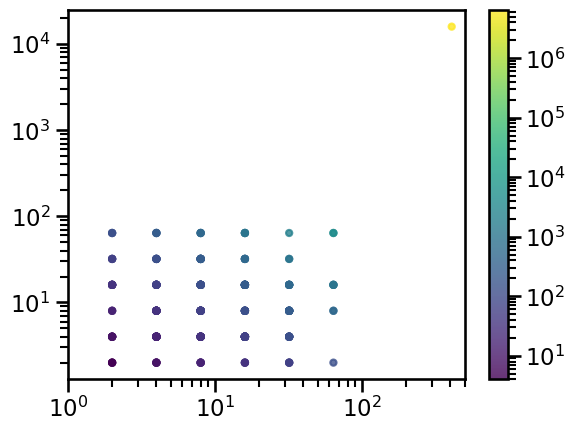

In [155]:
dfx = dfs[dfs['name']=='TensorFSTs_onlycomp']
plt.scatter( dfx["nstatesA"], dfx["nstatesB"], c=dfx['nstatesC'], s=20, alpha=0.8, norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,0.5e3)
plt.colorbar()